# Hierarchical clustering

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

Sepal length  Sepal width  Petal length  Petal width  labels
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


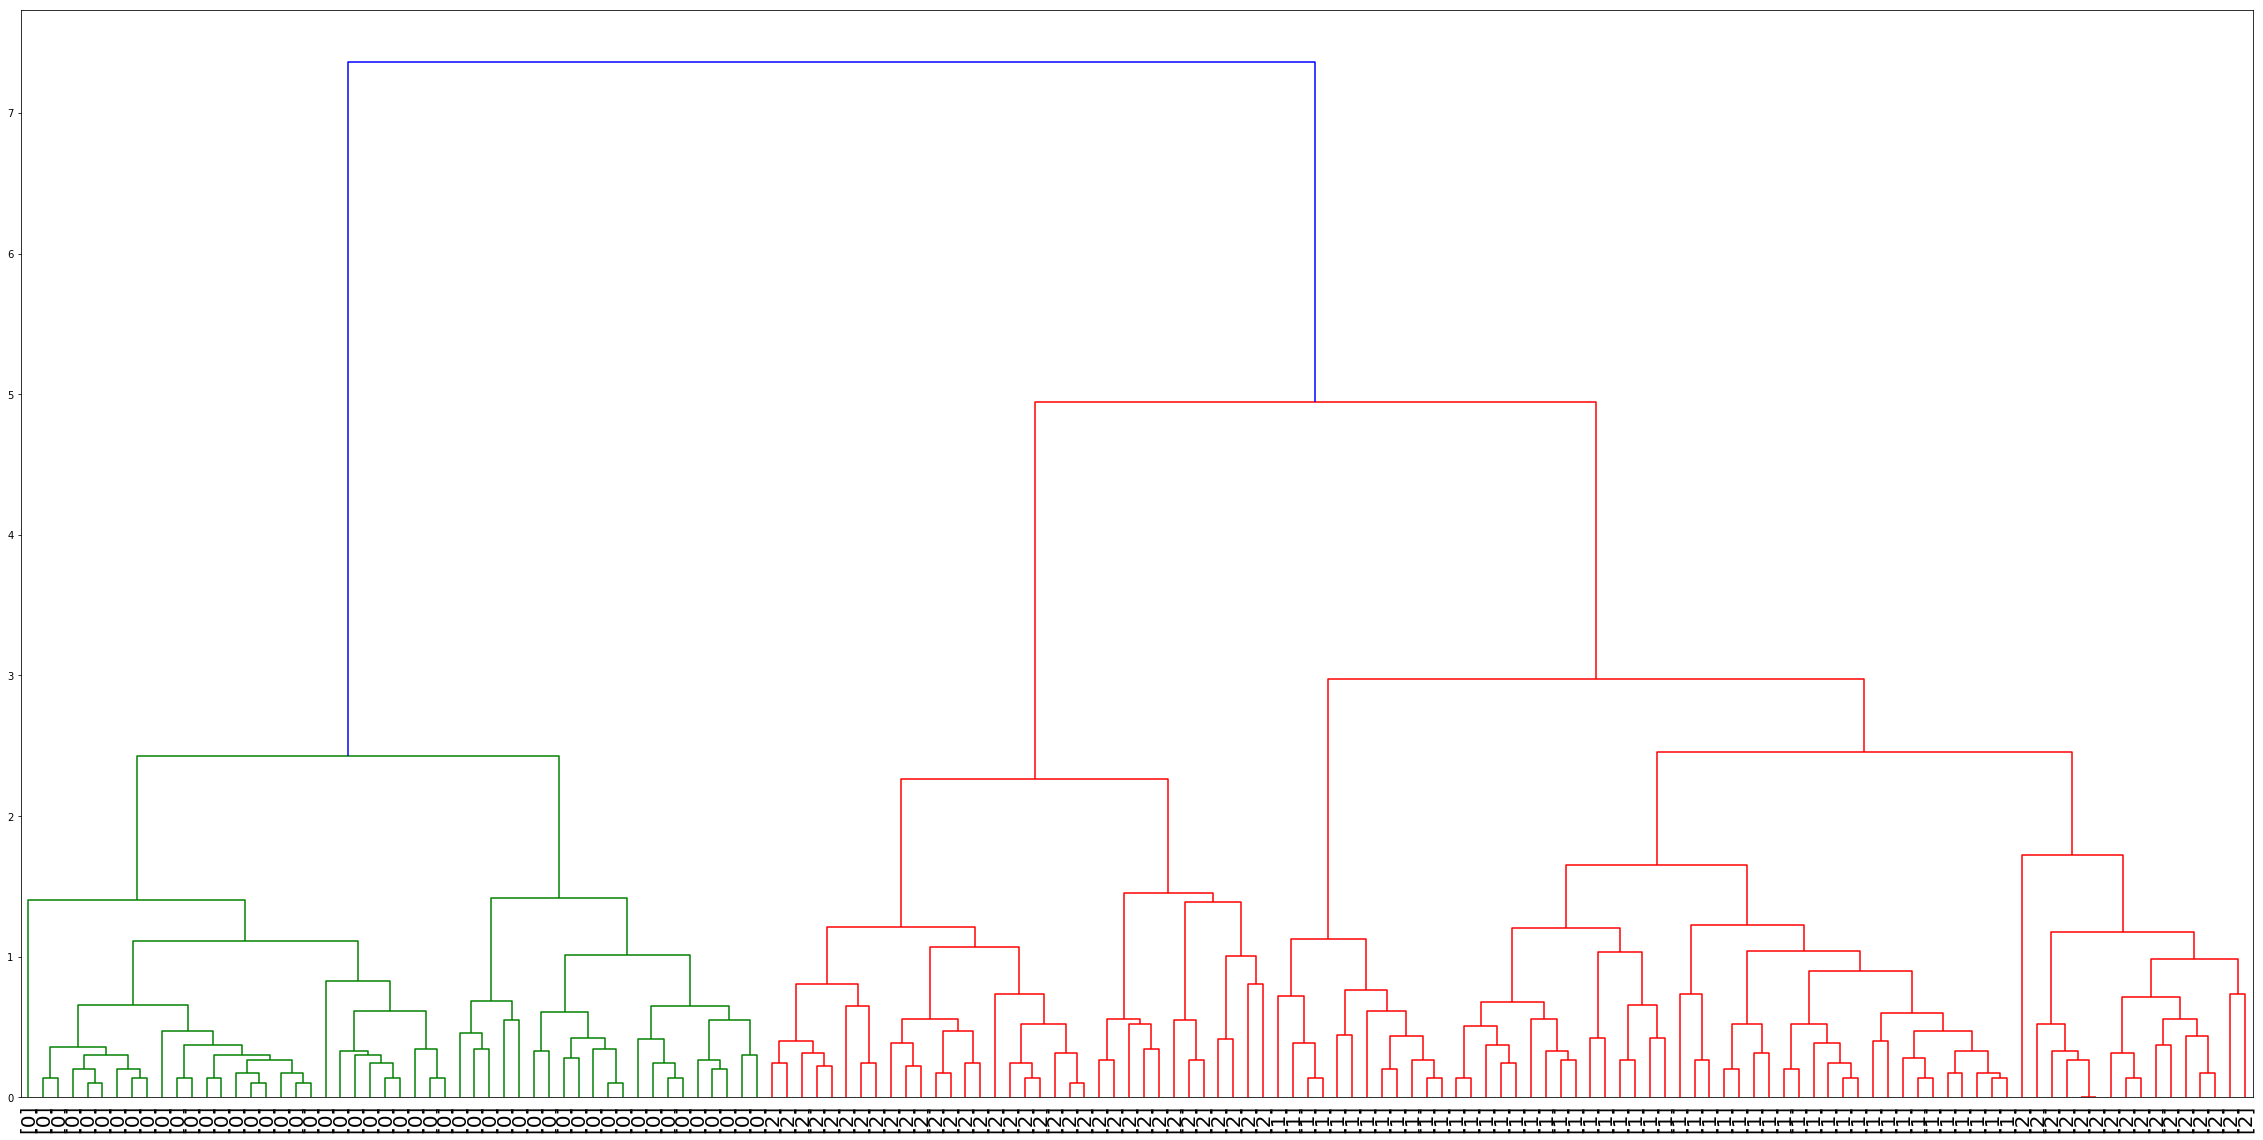

In [3]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete') ##complete: 클러스터링 두 그룹간의 최대거리

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
) 
plt.show()

In [4]:
from scipy.cluster.hierarchy import fcluster

##merging, 3 -> 세개로 나눠달라는 의미
predict = pd.DataFrame(fcluster(mergings,3,criterion='distance')) ##선을 긋는 것과 같은 걸 코드로 표현
predict.columns=['predict'] ##predict 군집방법에 의해 나눠진 그룹
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)
## labels와 predict의 번호는 같지 않아도 됨 -> 군집하면서 내부적으로 임의의 번호로 나눠 붙인거일 뿐

labels    0   1   2
predict            
1        50   0   0
2         0   0  34
3         0  50  16


# K-means clustering

In [5]:
import numpy as np # linear algebra
import seaborn as sns  #Python library for Vidualization

In [6]:
dataset = pd.read_csv('data/Mall_Customers.csv')

In [7]:
#Exploratory Data Analysis
#As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10) #Printing first 10 rows of the dataset

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

In [ ]:
##k-means는 numeric만 넣을 수 있음 (gender이런거 못 넣음)

In [8]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [9]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
#Missing values computation
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values
## k-means는 numeric만 가능하기 때문에 Annual income, Spending Score변수만 활용

In [12]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
score=[] ##엘보우 볼 때 y축에 score값들이 있었는데 그걸 의미

In [13]:
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0) ##init = 'kimeans++' -> 임의의 첫 점을 어떻게 지정해줄것이냐 (첫 임의의점을 선정후 그 다음 임의의점을 선택 할 때 거리를 계산해서 너무 가까운 거리로 되지 않도록 배치)
    kmeans.fit(X)
    score.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [14]:
score

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

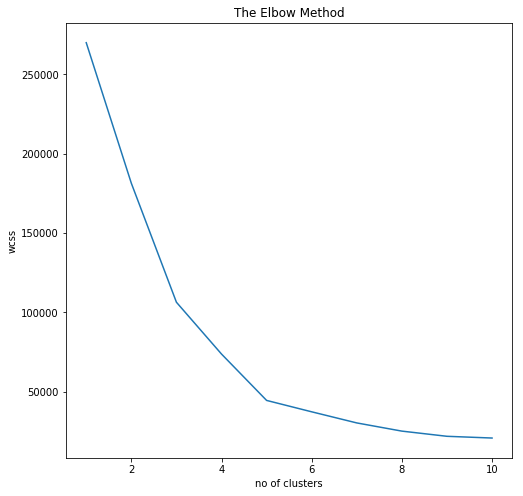

In [15]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

##5정도에서 꺾여진다고 볼 수 있음 -> k=5

In [16]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0) ##n_cluster가 k 즉 (k=5)
y_kmeans= kmeansmodel.fit_predict(X) ##모델 넣고 predict

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

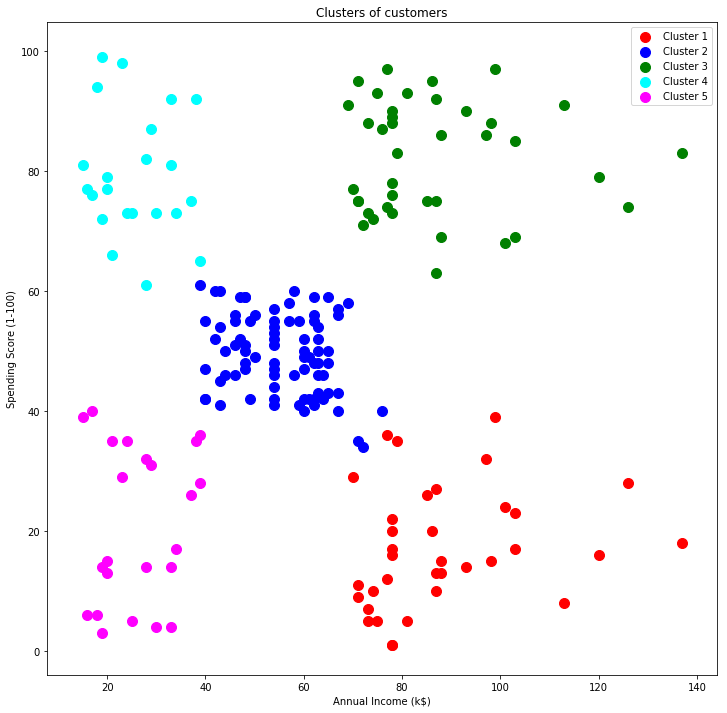

In [17]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##새롭게 나온 군집이 어떻게 구성되었는지 시각화
##해당 그룹 해석(인사이트) 
##ex.하늘색 보면(수익은 높은데 잘 쓰지 않음 -> 왜그럴지 따로 떼어내서 분석가능)